# Data Preparation

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader.yahoo.daily import YahooDailyReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['GOOG','MSFT']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MSFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-02,258.820007,264.690002,257.250000,264.600006,264.600006,39940400,MSFT
2023-02-03,259.540009,264.200012,257.100006,258.350006,258.350006,29062300,MSFT
2023-02-06,257.440002,258.299988,254.779999,256.769989,256.769989,22518000,MSFT
2023-02-07,260.529999,268.769989,260.079987,267.559998,267.559998,50841400,MSFT
2023-02-08,273.200012,276.760010,266.209991,266.730011,266.730011,54686000,MSFT
2023-02-09,273.799988,273.980011,262.799988,263.619995,263.619995,42375100,MSFT
2023-02-10,261.529999,264.089996,260.660004,263.100006,263.100006,25760900,MSFT
2023-02-13,267.640015,274.600006,267.149994,271.320007,271.320007,44630900,MSFT
2023-02-14,272.670013,274.970001,269.279999,272.170013,272.170013,37047900,MSFT


In [3]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,120.352293,121.751908,118.998882,120.371261,120.371261,2.693796e+07
std,17.950696,17.850693,17.866354,17.857718,17.857718,1.061507e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,103.801498,105.905502,103.019997,104.625999,104.625999,2.014000e+07
50%,118.420998,119.862000,117.116898,118.779999,118.779999,2.459600e+07
75%,137.109695,138.399506,135.699997,137.004501,137.004501,3.100090e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


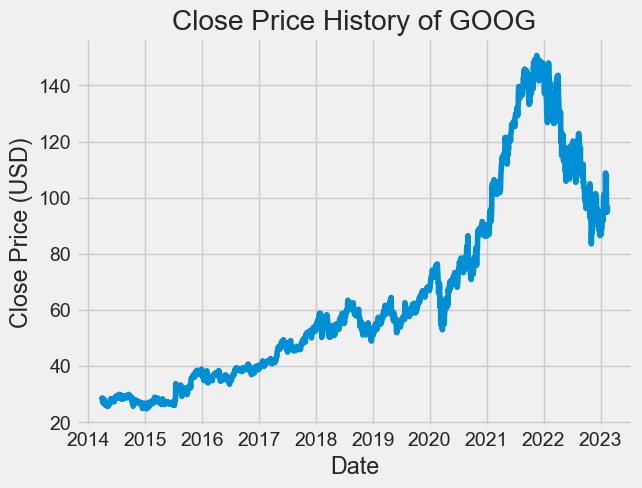

In [4]:
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())
plt.title('Close Price History of GOOG')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [5]:
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1792

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.55815088],
       [0.55775431],
       [0.57480677]])

## Training Data

In [7]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 100

for i in range(dat_size, len(train_data)):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037,
       0.01919393, 0.01508945, 0.01585086, 0.01740541, 0.02537644,
       0.01727057, 0.01430424, 0.016759  , 0.013638  , 0.01293211,
       0.00937092, 0.00975559, 0.0139394 , 0.01352696, 0.01538687,
       0.01403061, 0.01398302, 0.00895849, 0.00690426, 0.0073167 ,
       0.01038217, 0.01481978, 0.0160769 , 0.013523  , 0.01087788,
       0.01113565, 0.01439942, 0.01476029, 0.01839683, 0.02082383,
       0.02385362, 0.02910816, 0.02741481, 0.0267803 , 0.02670495,
       0.0243414 , 0.02077624, 0.0206652 , 0.0243295 , 0.02529316,
       0.0275893 , 0.02696668, 0.02628855, 0.02331825, 0.02348084,
       0.02051451, 0.02001087, 0.02411932, 0.02472607, 0.02530506,
       0.02871159, 0.02858072, 0.03414458, 0.03309367, 0.03358542,
       0.03280814, 0.03573879, 0.03560792, 0.03655572, 0.03557223,
       0.03114652, 0.0331254 , 0.03115049, 0.03435476, 0.0366

(1692, 100, 1)

## Testing Data

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [10]:
import pennylane as qml
from pennylane import optimize
import matplotlib.pyplot as plt

# Preparing Quantum memory layer

In [11]:
from CV_quantum_layers import CV_Encoding, CV_Measurement, Activation_Layer
from CV_quantum_layers import build_cv_quantum_node, QuantumLayer_MultiQunode

In [12]:
encode_AP = CV_Encoding('Amplitude_Phase')
Qrelu = Activation_Layer('ReLU', encode_AP)
Qsig = Activation_Layer('Sigmoid', encode_AP)
Qtanh = Activation_Layer('TanH', encode_AP)

In [ ]:
def 

# Defining our network

In [20]:
class LSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.get('glorot_uniform')
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        print(self.c.shape)
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        print(f'y_ft: {y_ft.shape}')
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        itC = y_it * y_c
        print(f'itC: {itC}')
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]

# Compiling the model

In [40]:
test_cell = LSTM(4)
test_cell.build([3,1])
test_cell.call(np.zeros((100, 1), dtype='float32'), np.zeros((5, 100, 1), dtype='float32'))

(5, 4)


InvalidArgumentError: {{function_node __wrapped____MklMatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [100,2], In[1]: [5,4] [Op:MatMul]

In [28]:
x_train[0].shape

(100, 1)

In [20]:
# Build the LSTM model
#cell = LSTM(8)
#layer = RNN(cell, return_sequences=True)

cell2 = LSTM(4)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
#model.add(layer)
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1688/1688 [==============================] - 315s 179ms/step - loss: 7.5857e-04
